In [46]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, io

(477, 640, 3)


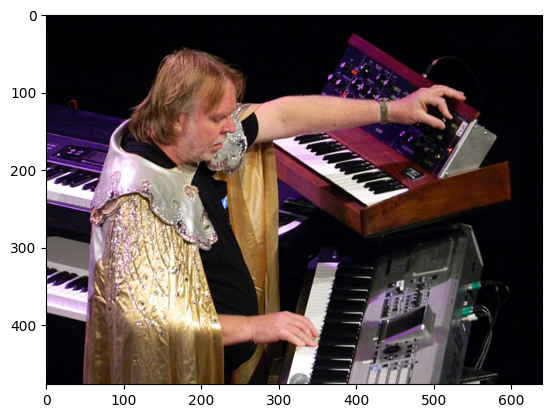

In [42]:
wakeman = plt.imread("./Rickwakemanmoog.jpg")
plt.imshow(wakeman)
print(wakeman.shape)

(477, 640)


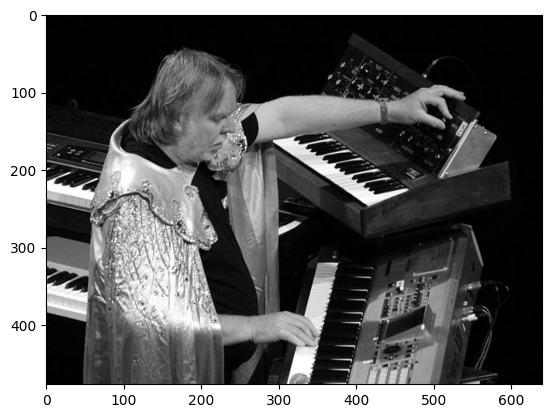

In [45]:
wakeman_gray = color.rgb2gray(wakeman)
plt.imshow(wakeman_gray, cmap="gray")
print(wakeman_gray.shape)

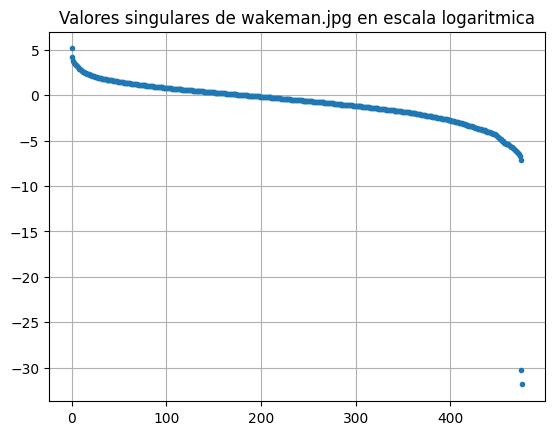

In [55]:
[U, S, Vh] = np.linalg.svd(wakeman_gray)
plt.grid()
plt.title("Valores singulares de wakeman.jpg en escala logaritmica")
plt.plot(np.log(S), ".")

In [54]:
def truncateSigma(A, S, k):
    [nRow, nCol] = np.shape(A)
    Sigma = np.zeros((nRow, nCol))
    Sigma[:k, :k] = np.diag(S[:k])
    return(Sigma)

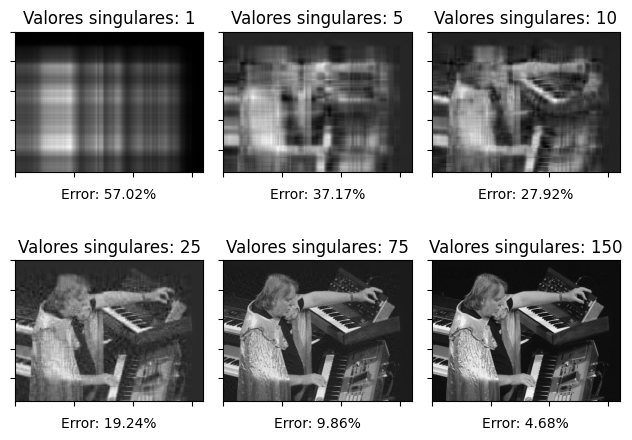

In [128]:
fig, axs = plt.subplots(2, 3) 
singular_values = [1, 5, 10, 25, 75, 150] 

for idx, i in enumerate(singular_values):
    S_trunc = truncateSigma(wakeman_gray, S, i)
    wakeman_gray_trunc = U @ S_trunc @ Vh
    row = idx // 3
    col = idx % 3
    axs[row, col].set_title(f'Valores singulares: {i}')
    axs[row, col].imshow(wakeman_gray_trunc, cmap='gray')
    axs[row, col].set_yticklabels([])
    axs[row, col].set_xticklabels([])
    rel_err = round((np.linalg.norm(wakeman_gray - wakeman_gray_trunc))/np.linalg.norm(wakeman_gray)*100, 2)
    axs[row, col].set_xlabel(f'Error: {rel_err}%')
    

plt.tight_layout()